In [1]:
import glob
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [93]:
import matplotlib
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=14) 

In [9]:
t = pd.read_hdf("/home/centos/mount_point/data/artificial_experiments/optimizatio_nosyst/skopt/inferno.h5")

In [10]:
t

,call,inferno_lr,temperature,inferno_neurons,score
16,16,0.008576,0.990000,20,674.550224
12,12,0.010000,0.990000,20,675.294983
20,20,0.009151,0.863781,20,675.891823
28,28,0.008695,0.779587,20,675.950643
27,27,0.010000,0.746811,20,676.124892
26,26,0.010000,0.721429,20,677.148975
22,22,0.009096,0.990000,20,677.980965
24,24,0.007973,0.990000,20,679.979972
29,29,0.008760,0.783930,20,680.217078
23,23,0.010000,0.990000,20,681.944745


## Shape + weight syst

In [12]:
def load_minos(path):
    
    bce = []
    bce_corr = []
    bce_np = []
    inferno = []
    inferno_corr = []
    inferno_np = []
    for syst in ["jes", "jer", "taue"]:
        
        path_name = path + "shape_syst/" + syst
        with open(path_name + '/fit/bce_asimov/fit_results.json') as json_file:
            results = json.load(json_file)
            print(results)
            bce.append(results["minos_mu"])
            dim = int(np.sqrt(len(results["corr_mat"])))
            corrmat = np.array(results["corr_mat"]).reshape(dim, dim)
            idx_mu = results["labels"].index('mu')
            idx_np = results["labels"].index("TTJets_signal_" + syst)
            bce_corr.append(corrmat[idx_mu, idx_np])
            bce_np.append(results["uncertainty"][idx_np])
        with open(path_name + '/fit/inferno_asimov/fit_results.json') as json_file:
            results = json.load(json_file)
            #print(results)
            inferno.append(results["minos_mu"])
            dim = int(np.sqrt(len(results["corr_mat"])))
            corrmat = np.array(results["corr_mat"]).reshape(dim, dim)
            idx_mu = results["labels"].index('mu')
            idx_np = results["labels"].index("TTJets_signal_" + syst)
            inferno_corr.append(corrmat[idx_mu, idx_np])
            inferno_np.append(results["uncertainty"][idx_np])
            
    for syst in ["btag", "trigger_jet", "trigger_tau"]:
        
        path_name = path + "weight_syst/" + syst
        with open(path_name + '/fit/bce_asimov/fit_results.json') as json_file:
            results = json.load(json_file)
            print(results)
            bce.append(results["minos_mu"])
            dim = int(np.sqrt(len(results["corr_mat"])))
            corrmat = np.array(results["corr_mat"]).reshape(dim, dim)
            idx_mu = results["labels"].index('mu')
            idx_np = results["labels"].index("TTJets_signal_" + syst)
            bce_corr.append(corrmat[idx_mu, idx_np])
            bce_np.append(results["uncertainty"][idx_np])
        with open(path_name + '/fit/inferno_asimov/fit_results.json') as json_file:
            results = json.load(json_file)
            #print(results)
            inferno.append(results["minos_mu"])
            dim = int(np.sqrt(len(results["corr_mat"])))
            corrmat = np.array(results["corr_mat"]).reshape(dim, dim)
            idx_mu = results["labels"].index('mu')
            idx_np = results["labels"].index("TTJets_signal_" + syst)
            inferno_corr.append(corrmat[idx_mu, idx_np])
            inferno_np.append(results["uncertainty"][idx_np])     
            
    return bce, inferno, bce_corr, inferno_corr, bce_np, inferno_np

In [13]:
path = "/home/centos/mount_point/data/artificial_experiments/"
bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np = load_minos(path)

{'labels': ['mu', 'TTJets_signal_jes'], 'bestfit': [1.000000029770888, 1.618159506822786e-07], 'uncertainty': [0.0999755791271551, 0.9053872482650054], 'minos_mu': [-0.09404221008597995, 0.11354024341001379], 'corr_mat': [1.0000000000000002, -0.4237154237495552, -0.4237154237495552, 1.0]}
{'labels': ['mu', 'TTJets_signal_jer'], 'bestfit': [1.0000000003574108, -1.385133327480581e-12], 'uncertainty': [0.08891586040326127, 0.9925123535914272], 'minos_mu': [-0.08769519976288545, 0.0901458861333309], 'corr_mat': [1.0000000000000002, 0.011821212276431707, 0.011821212276431707, 0.9999999999999999]}
{'labels': ['mu', 'TTJets_signal_taue'], 'bestfit': [1.0000000292523357, 1.1165973444254504e-07], 'uncertainty': [0.09651623828185907, 0.9913889423792019], 'minos_mu': [-0.09210772186050042, 0.10494044468466479], 'corr_mat': [1.0, -0.3824354651993667, -0.3824354651993667, 0.9999999999999999]}
{'labels': ['mu', 'TTJets_signal_btag'], 'bestfit': [1.0000000014136912, 4.580546098670313e-11], 'uncertain

In [20]:
def compare_bce_inf(bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np):

    
    x = np.arange(6)
    y = np.ones(6)

    fig, axs = plt.subplots(3,1,figsize=(10,8),gridspec_kw={'height_ratios': [1, 1, 1]}, dpi=100)

    ax1 = axs[0]
    ax1.errorbar(x-0.05, y, yerr=abs(np.array(bce)).T, fmt='o')
    ax1.errorbar(x+0.05, y, yerr=abs(np.array(inferno)).T, fmt='o')
    ax1.set_ylim([0.8, 1.2])
    ax1.get_xaxis().set_ticks([])
    ax1.set_ylabel(r"$\sigma(\mu)$", size=20)
    ax1.axhline(y=1., color='black', linestyle='dotted')

    ax2 = axs[2]
    ax2.errorbar(x-0.05, bce_corr, fmt='o', label="BCE")
    ax2.errorbar(x+0.05, inferno_corr, fmt='o', label="INFERNO")
    ax2.set_ylim([-1, 1.])
    ax2.set_ylabel(r"$\mathrm{Corr}(\mu, \mathrm{NP})$", size=20)
    ax2.axhline(y=0., color='black', linestyle='dotted')
    labels = ["jes", "jer", "taue", "btag", "trigger_jet", "trigger_tau"]
    #ax2.get_xaxis().set_ticks(shifts)
    plt.xticks(range(6), labels, rotation=30)
    plt.legend(loc="upper left", prop={'size': 12})

    ax3 = axs[1]
    x = np.arange(6)
    y = np.zeros(6)
    ax3.errorbar(x-0.05, y, yerr=abs(np.array(bce_np)).T, fmt='o')
    ax3.errorbar(x+0.05, y, yerr=abs(np.array(inferno_np)).T, fmt='o')
    ax3.set_ylim([-2., 2.0])
    ax3.get_xaxis().set_ticks([])
    ax3.set_ylabel(r"$\sigma(\mathrm{NP})$", size=20)
    ax3.axhline(y=0., color='black', linestyle='dotted')
    #fig.tight_layout()
    fig.subplots_adjust(hspace=0.1)
    plt.show()

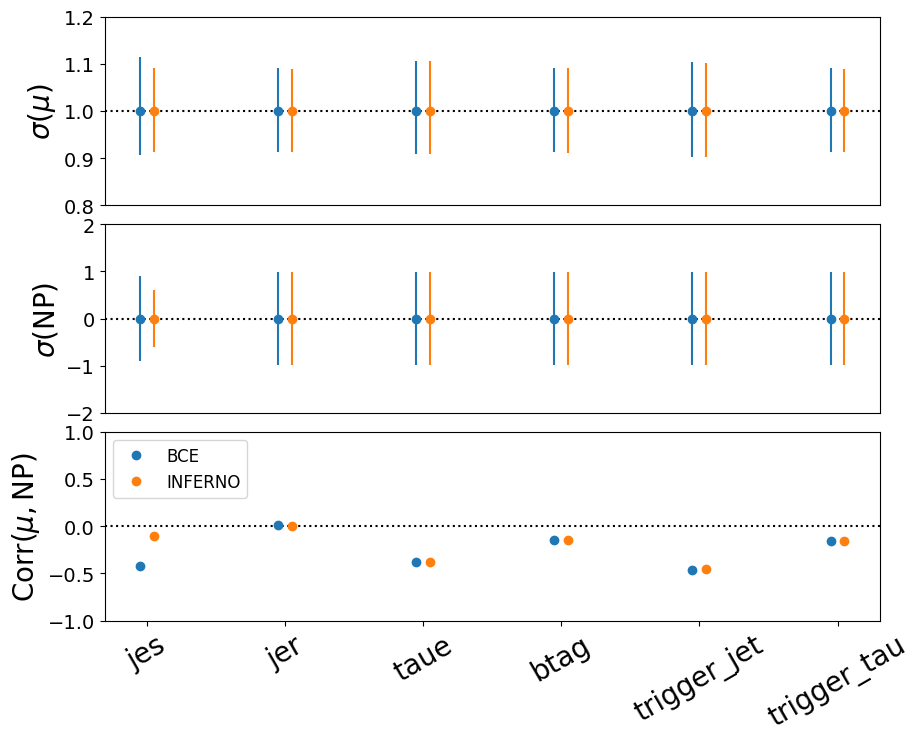

In [21]:
compare_bce_inf(bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np)

## Artificial signal aplanarity

In [151]:
def load_minos(path, name, np_name="TTJets_signal_artsig_aplanarity", n_points=5):
    
    bce = []
    bce_corr = []
    bce_np = []
    inferno = []
    inferno_corr = []
    inferno_np = []
    for i in range(n_points):
        
        path_name = path + name + "_" + str(i)
        with open(path_name + '/fit/bce_asimov/fit_results.json') as json_file:
            results = json.load(json_file)
            print(results)
            bce.append(results["minos_mu"])
            dim = int(np.sqrt(len(results["corr_mat"])))
            corrmat = np.array(results["corr_mat"]).reshape(dim, dim)
            idx_mu = results["labels"].index('mu')
            idx_np = results["labels"].index(np_name)
            bce_corr.append(corrmat[idx_mu, idx_np])
            bce_np.append(results["uncertainty"][idx_np])
        with open(path_name + '/fit/inferno_asimov/fit_results.json') as json_file:
            results = json.load(json_file)
            #print(results)
            inferno.append(results["minos_mu"])
            dim = int(np.sqrt(len(results["corr_mat"])))
            corrmat = np.array(results["corr_mat"]).reshape(dim, dim)
            idx_mu = results["labels"].index('mu')
            idx_np = results["labels"].index(np_name)
            inferno_corr.append(corrmat[idx_mu, idx_np])
            inferno_np.append(results["uncertainty"][idx_np])
            
    return bce, inferno, bce_corr, inferno_corr, bce_np, inferno_np

In [152]:
path = "/home/centos/mount_point/data/artificial_experiments/artificial_sigshift/"
name = "shift"
bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np = load_minos(path, name)

{'labels': ['mu', 'TTJets_signal_artsig_aplanarity'], 'bestfit': [1.0000000291862483, 7.504829272787783e-09], 'uncertainty': [0.10542712142214533, 0.9912126346527314], 'minos_mu': [-0.10141071640244533, 0.10985469777069325], 'corr_mat': [1.0000000000000002, -0.5428335283048958, -0.5428335283048958, 0.9999999999999999]}
{'labels': ['mu', 'TTJets_signal_artsig_aplanarity'], 'bestfit': [1.0000000017476456, 5.749569821980605e-10], 'uncertainty': [0.10828128762359035, 0.9868332236022319], 'minos_mu': [-0.10372266695993637, 0.11334647987970908], 'corr_mat': [1.0, -0.5755232300193595, -0.5755232300193595, 1.0000000000000002]}
{'labels': ['mu', 'TTJets_signal_artsig_aplanarity'], 'bestfit': [1.0000000069760888, 1.9007380717105116e-09], 'uncertainty': [0.11334908742466265, 0.9751143543816893], 'minos_mu': [-0.10804403582532673, 0.11920924129111155], 'corr_mat': [0.9999999999999999, -0.6203816379981306, -0.6203816379981306, 1.0000000000000002]}
{'labels': ['mu', 'TTJets_signal_artsig_aplanarity'

In [159]:
def compare_bce_inf(bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np, name, murange=[0.85, 1.15]):

    
    x = np.arange(5)
    y = np.ones(5)

    fig, axs = plt.subplots(3,1,figsize=(10,8),gridspec_kw={'height_ratios': [1, 1, 1]}, dpi=100)

    ax1 = axs[0]
    ax1.errorbar(x-0.05, y, yerr=abs(np.array(bce)).T, fmt='o')
    ax1.errorbar(x+0.05, y, yerr=abs(np.array(inferno)).T, fmt='o')
    ax1.set_ylim(murange)
    ax1.get_xaxis().set_ticks([])
    ax1.set_ylabel(r"$\sigma(\mu)$", size=20)
    ax1.axhline(y=1., color='black', linestyle='dotted')
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax1.yaxis.grid(which='major', alpha=1)
    minor_locator = matplotlib.ticker.AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator)
    ax1.yaxis.grid(which='minor', alpha=1)
    #ax.grid(which='minor', alpha=0.2)

    ax2 = axs[2]
    ax2.errorbar(x-0.05, bce_corr, fmt='o', label="BCE")
    ax2.errorbar(x+0.05, inferno_corr, fmt='o', label="INFERNO")
    ax2.set_ylim([-1, 1.])
    ax2.set_ylabel(r"$\rho(\mu, \theta)$", size=20)
    ax2.axhline(y=0., color='black', linestyle='dotted')
    #shifts = ["shift " + str(i) for i in range(5)]
    #ax2.get_xaxis().set_ticks(shifts)
    shifts = np.linspace(0.005, 0.02, 5)
    ax2.set_xlabel("shift", size=20)
    plt.xticks(range(5), shifts)
    plt.legend(loc="upper left", prop={'size': 12})

    ax3 = axs[1]
    x = np.arange(5)
    y = np.zeros(5)
    ax3.errorbar(x-0.05, y, yerr=abs(np.array(bce_np)).T, fmt='o')
    ax3.errorbar(x+0.05, y, yerr=abs(np.array(inferno_np)).T, fmt='o')
    ax3.set_ylim([-1.1, 1.1])
    ax3.get_xaxis().set_ticks([])
    ax3.set_ylabel(r"$\sigma(\theta)$", size=20)
    ax3.axhline(y=0., color='black', linestyle='dotted')
    #fig.tight_layout()
    fig.subplots_adjust(hspace=0.1)
    fig.savefig("figures/" + name + ".pdf", bbox_inches="tight")
    plt.show()

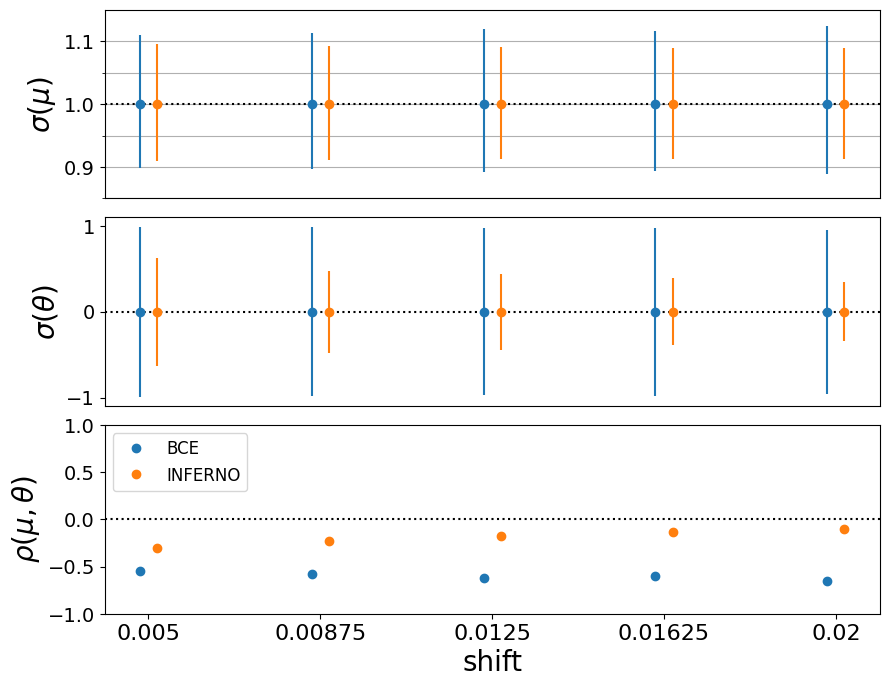

In [160]:
compare_bce_inf(bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np, name="comp_artsig")

## Bkg variation aplanarity

In [145]:
path = "/home/centos/mount_point/data/artificial_experiments/artificial_bkgshift/"
name = "shift"
bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np = load_minos(path, name, np_name="QCD_artbkg_aplanarity")

{'labels': ['QCD_artbkg_aplanarity', 'mu'], 'bestfit': [0.0, 1.0], 'uncertainty': [0.3242294127409612, 0.09354237571971974], 'minos_mu': [-0.09232521132952884, 0.09468681511750243], 'corr_mat': [1.0000000000000002, -0.3355961884965036, -0.3355961884965036, 1.0]}
{'labels': ['QCD_artbkg_aplanarity', 'mu'], 'bestfit': [9.13044958692974e-09, 1.0000000291716797], 'uncertainty': [0.22368982877890442, 0.09271016499447504], 'minos_mu': [-0.09146090056263194, 0.09397640321409731], 'corr_mat': [1.0, -0.3066551348700347, -0.3066551348700347, 1.0000000000000002]}
{'labels': ['QCD_artbkg_aplanarity', 'mu'], 'bestfit': [0.0, 1.0], 'uncertainty': [0.19082434321694666, 0.09401580562795836], 'minos_mu': [-0.09275896567845264, 0.0952781306413542], 'corr_mat': [0.9999999999999998, -0.3350881984620233, -0.3350881984620233, 1.0]}
{'labels': ['QCD_artbkg_aplanarity', 'mu'], 'bestfit': [2.775307500046259e-08, 1.0000000291206466], 'uncertainty': [0.12653030313728708, 0.09168912117271122], 'minos_mu': [-0.090

In [119]:
compare_bce_inf(bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np)

TypeError: compare_bce_inf() missing 1 required positional argument: 'name'

## Sig norm variation

In [126]:
path = "/home/centos/mount_point/data/artificial_experiments/artificial_signorm/"
name = "norm"
bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np = load_minos(path, name, np_name="lumi")

{'labels': ['mu', 'lumi'], 'bestfit': [1.0, 0.0], 'uncertainty': [0.09110602976632987, 0.9933391607085241], 'minos_mu': [-0.08956686042237459, 0.09268954342599395], 'corr_mat': [1.0, -0.2195307873654383, -0.2195307873654383, 1.0000000000000002]}
{'labels': ['mu', 'lumi'], 'bestfit': [1.0000000047456539, 6.285213313347859e-10], 'uncertainty': [0.0968164988675062, 0.993320720395209], 'minos_mu': [-0.09421182917664464, 0.09962583785895879], 'corr_mat': [1.0000000000000002, -0.4132040235923754, -0.4132040235923754, 1.0]}
{'labels': ['mu', 'lumi'], 'bestfit': [1.000000002267904, 8.94460297929528e-10], 'uncertainty': [0.1066406598990759, 0.9933222385502652], 'minos_mu': [-0.10217773061071629, 0.11167899277622609], 'corr_mat': [1.0, -0.5628742950306177, -0.5628742950306177, 0.9999999999999999]}
{'labels': ['mu', 'lumi'], 'bestfit': [1.0000000006942467, 5.069124269646563e-10], 'uncertainty': [0.11922573100508643, 0.9932813138398147], 'minos_mu': [-0.11214041258996908, 0.12752417571552177], 'co

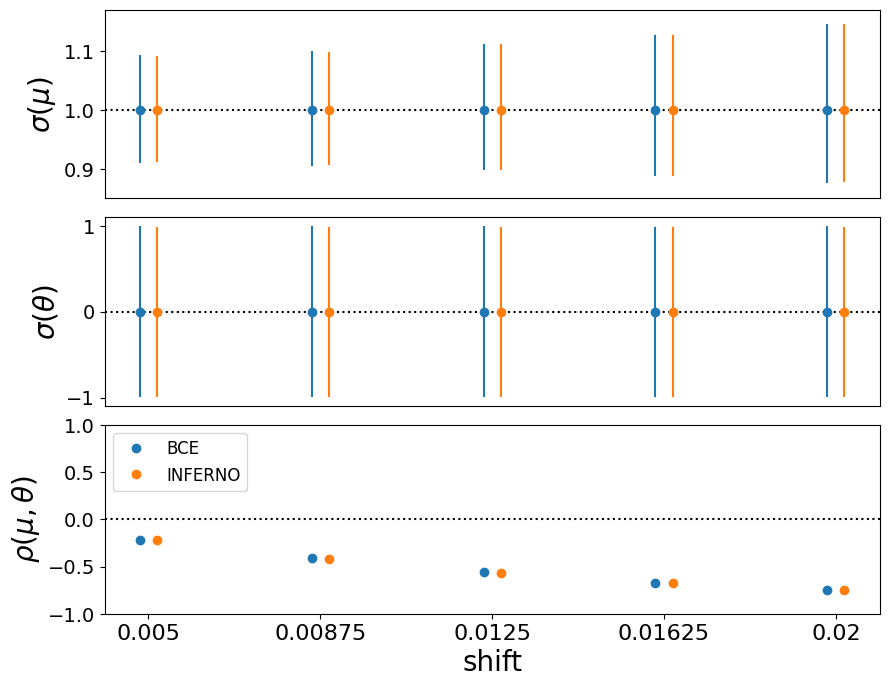

In [127]:
compare_bce_inf(bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np, name="normsig", murange=[0.85, 1.17])

## Bkg norm variation

In [128]:
path = "/home/centos/mount_point/data/artificial_experiments/artificial_bkgnorm/"
name = "norm"
bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np = load_minos(path, name, np_name="mistag")

{'labels': ['mistag', 'mu'], 'bestfit': [0.0, 1.0], 'uncertainty': [0.3930857855911173, 0.09196624750091037], 'minos_mu': [-0.09071780386170882, 0.09323037188550481], 'corr_mat': [1.0000000000000002, -0.27236284818849693, -0.27236284818849693, 1.0]}
{'labels': ['mistag', 'mu'], 'bestfit': [0.0, 1.0], 'uncertainty': [0.20924448578051197, 0.09260714303586526], 'minos_mu': [-0.09134969755198144, 0.09387544793243065], 'corr_mat': [1.0000000000000002, -0.2906491551530082, -0.2906491551530082, 1.0000000000000002]}
{'labels': ['mistag', 'mu'], 'bestfit': [5.240600174259355e-08, 1.0000000292300706], 'uncertainty': [0.14084549047921907, 0.09252888043194346], 'minos_mu': [-0.09127273237617164, 0.09379736940657998], 'corr_mat': [0.9999999999999998, -0.2918909681278745, -0.2918909681278745, 1.0000000000000002]}
{'labels': ['mistag', 'mu'], 'bestfit': [0.0, 1.0], 'uncertainty': [0.10587912514000519, 0.09303727858477179], 'minos_mu': [-0.09178998254865552, 0.09429787490330459], 'corr_mat': [1.0, -0.

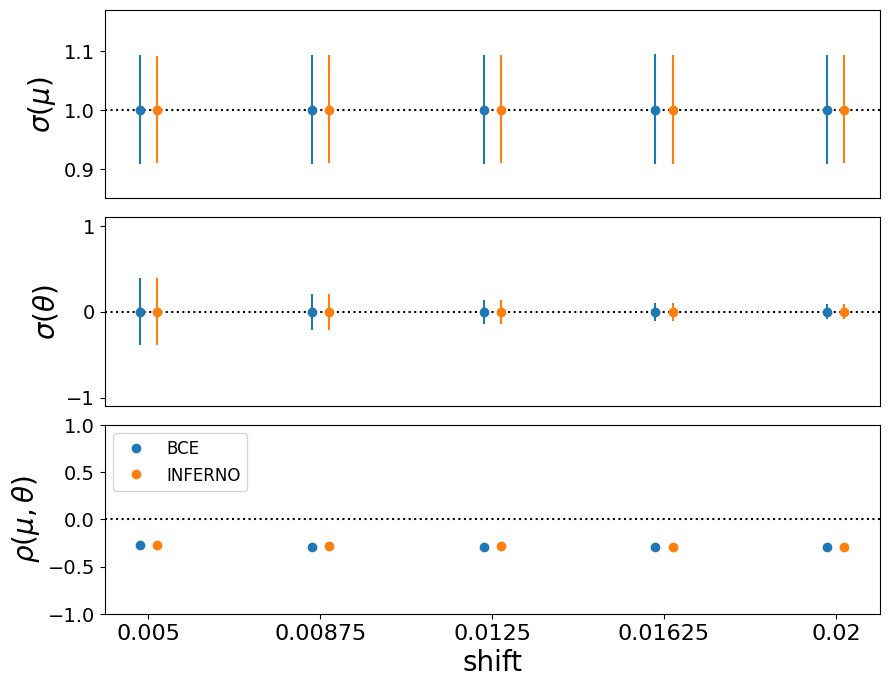

In [129]:
compare_bce_inf(bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np, name = "bkgnorm", murange=[0.85, 1.17])

## Sigbkg variation

In [130]:
def load_minos_sigbkg(path, name, n_points=5):
    
    bce = []
    bce_np0, bce_np1 = [], []
    bce_corr0, bce_corr1, bce_corr2 = [], [], []
    inferno = []
    inferno_np0, inferno_np1 = [], []
    inferno_corr0, inferno_corr1, inferno_corr2 = [], [], []
    for i in range(n_points):
        
        path_name = path + name + "_" + str(i)
        with open(path_name + '/fit/bce_asimov/fit_results.json') as json_file:
            results = json.load(json_file)
            print(results)
            bce.append(results["minos_mu"])
            dim = int(np.sqrt(len(results["corr_mat"])))
            corrmat = np.array(results["corr_mat"]).reshape(dim, dim)
            idx_mu = results["labels"].index('mu')
            idx_np0 = results["labels"].index("TTJets_signal_artsig_aplanarity")
            idx_np1 = results["labels"].index("QCD_artbkg_aplanarity")
            bce_np0.append(results["uncertainty"][idx_np0])
            bce_np1.append(results["uncertainty"][idx_np1])
            bce_corr0.append(corrmat[idx_mu, idx_np0])
            bce_corr1.append(corrmat[idx_mu, idx_np1])
            bce_corr2.append(corrmat[idx_np0, idx_np1])
            
        with open(path_name + '/fit/inferno_asimov/fit_results.json') as json_file:
            results = json.load(json_file)
            print(results)
            inferno.append(results["minos_mu"])
            dim = int(np.sqrt(len(results["corr_mat"])))
            corrmat = np.array(results["corr_mat"]).reshape(dim, dim)
            idx_mu = results["labels"].index('mu')
            idx_np0 = results["labels"].index("TTJets_signal_artsig_aplanarity")
            idx_np1 = results["labels"].index("QCD_artbkg_aplanarity")
            inferno_np0.append(results["uncertainty"][idx_np0])
            inferno_np1.append(results["uncertainty"][idx_np1])
            inferno_corr0.append(corrmat[idx_mu, idx_np0])
            inferno_corr1.append(corrmat[idx_mu, idx_np1])
            inferno_corr2.append(corrmat[idx_np0, idx_np1])
            
    return {'bce' : bce, 'bce_np0' : bce_np0, 'bce_np1' : bce_np1,
            'bce_corr0' : bce_corr0, 'bce_corr1' : bce_corr1, 'bce_corr2' : bce_corr2,
            'inferno' : inferno, 'inferno_np0' : inferno_np0, 'inferno_np1' : inferno_np1,
            'inferno_corr0' : inferno_corr0, 'inferno_corr1' : inferno_corr1, 'inferno_corr2' : inferno_corr2,
           }



In [131]:
path = "/home/centos/mount_point/data/artificial_sigbkg/"
name = "shift"
artsig = load_minos_sigbkg(path, name)

{'labels': ['QCD_norm', 'QCD_artbkg_aplanarity', 'mu', 'TTJets_signal_artsig_aplanarity'], 'bestfit': [1.0000000024574853, -4.8146989837290904e-08, 1.0000000209521336, 1.3047306873792408e-08], 'uncertainty': [0.026996666921727863, 0.4147277858871671, 0.12137966295388114, 0.9929934315112854], 'minos_mu': [-0.11549467572369825, 0.12789856945302366], 'corr_mat': [1.0, -0.590634320604855, -0.063199264822639, 0.042744730493084304, -0.590634320604855, 1.0, -0.30401226892662314, 0.03321994291439514, -0.063199264822639, -0.30401226892662314, 0.9999999999999999, -0.5293577668477807, 0.042744730493084304, 0.03321994291439514, -0.5293577668477807, 1.0000000000000002]}
{'labels': ['QCD_norm', 'QCD_artbkg_aplanarity', 'mu', 'TTJets_signal_artsig_aplanarity'], 'bestfit': [1.000000001273667, -3.868339360814377e-08, 1.000000012731702, 6.790599002461789e-08], 'uncertainty': [0.030435781401211837, 0.38720923126480045, 0.10365130027825031, 0.6383142898696524], 'minos_mu': [-0.10143760619240393, 0.1059094

In [132]:
artsig

{'bce': [[-0.11549467572369825, 0.12789856945302366],
  [-0.11983102110226089, 0.13329342989573564],
  [-0.12477811404997129, 0.14068213773805077],
  [-0.1317013552934543, 0.1551332471127977],
  [-0.1407934771718631, 0.1715708575006616]],
 'bce_np0': [0.9929934315112854,
  0.9916380953155988,
  0.9926484765902068,
  0.990045049439144,
  0.9901315205203065],
 'bce_np1': [0.4147277858871671,
  0.25220235623966697,
  0.1662041633752393,
  0.11538651529968022,
  0.1249891998772672],
 'bce_corr0': [-0.5293577668477807,
  -0.5724140327708143,
  -0.6206481773304118,
  -0.6879482425920327,
  -0.7263924753608934],
 'bce_corr1': [-0.30401226892662314,
  -0.2915659793871689,
  -0.2960253032943119,
  -0.3062034250901593,
  -0.3800515219594056],
 'bce_corr2': [0.03321994291439514,
  0.04080731959360036,
  0.06874231149866897,
  0.10949326546702892,
  0.1592782630036098],
 'inferno': [[-0.10143760619240393, 0.10590947857572613],
  [-0.09842998382847687, 0.1024263753053571],
  [-0.09727822340976815, 

In [133]:
def compare_bce_inf(artsig):
    
    x = np.arange(5)
    y = np.ones(5)

    fig, axs = plt.subplots(6,1,figsize=(12,10),gridspec_kw={'height_ratios': [1, 1, 1, 1, 1, 1]}, dpi=100)

    ax1 = axs[0]
    ax1.errorbar(x-0.05, y, yerr=abs(np.array(artsig["bce"])).T, fmt='o')
    ax1.errorbar(x+0.05, y, yerr=abs(np.array(artsig["inferno"])).T, fmt='o')
    ax1.set_ylim([0.8, 1.2])
    ax1.get_xaxis().set_ticks([])
    ax1.set_ylabel(r"$\sigma(\mu)$", size=16)
    ax1.axhline(y=1., color='black', linestyle='dotted')

    y = np.zeros(5)
    ax2 = axs[1]
    ax2.errorbar(x-0.05, y, yerr=abs(np.array(artsig["bce_np0"])).T, fmt='o')
    ax2.errorbar(x+0.05, y, yerr=abs(np.array(artsig["inferno_np0"])).T, fmt='o')
    ax2.set_ylim([-2., 2.0])
    ax2.get_xaxis().set_ticks([])
    ax2.set_ylabel(r"$\sigma(\theta_0)$", size=16)
    ax2.axhline(y=0., color='black', linestyle='dotted')
    
    ax3 = axs[2]
    ax3.errorbar(x-0.05, y, yerr=abs(np.array(artsig["bce_np1"])).T, fmt='o')
    ax3.errorbar(x+0.05, y, yerr=abs(np.array(artsig["inferno_np1"])).T, fmt='o')
    ax3.set_ylim([-2., 2.0])
    ax3.get_xaxis().set_ticks([])
    ax3.set_ylabel(r"$\sigma(\theta_1)$", size=16)
    ax3.axhline(y=0., color='black', linestyle='dotted')

    ax4 = axs[3]
    ax4.errorbar(x-0.05, artsig["bce_corr0"], fmt='o', label="BCE")
    ax4.errorbar(x+0.05, artsig["inferno_corr0"], fmt='o', label="INFERNO")
    ax4.set_ylim([-1, 1.])
    ax4.get_xaxis().set_ticks([])
    ax4.set_ylabel(r"$\rho(\mu, \theta_0)$", size=16)
    ax4.axhline(y=0., color='black', linestyle='dotted')
    
    ax5 = axs[4]
    ax5.errorbar(x-0.05, artsig["bce_corr1"], fmt='o', label="BCE")
    ax5.errorbar(x+0.05, artsig["inferno_corr1"], fmt='o', label="INFERNO")
    ax5.set_ylim([-1, 1.])
    ax5.get_xaxis().set_ticks([])
    ax5.set_ylabel(r"$\rho(\mu, \theta_1)$", size=16)
    ax5.axhline(y=0., color='black', linestyle='dotted')
    
    ax6 = axs[5]
    ax6.errorbar(x-0.05, artsig["bce_corr2"], fmt='o', label="BCE")
    ax6.errorbar(x+0.05, artsig["inferno_corr2"], fmt='o', label="INFERNO")
    ax6.set_ylim([-1, 1.])
    ax6.get_xaxis().set_ticks([])
    ax6.set_ylabel(r"$\rho(\theta_0, \theta_1)$", size=16)
    ax6.set_xlabel("shift", size=20)
    ax6.axhline(y=0., color='black', linestyle='dotted')
    
    #shifts = ["shift " + str(i) for i in range(5)]
    shifts = np.linspace(0.005, 0.02, 5)
    #ax2.get_xaxis().set_ticks(shifts)
    plt.xticks(range(5), shifts)
    plt.legend(loc="upper left", prop={'size': 8})

    #fig.tight_layout()
    fig.subplots_adjust(hspace=0.15)
    fig.savefig("figures/twonuis.pdf", bbox_inches="tight")
    plt.show()

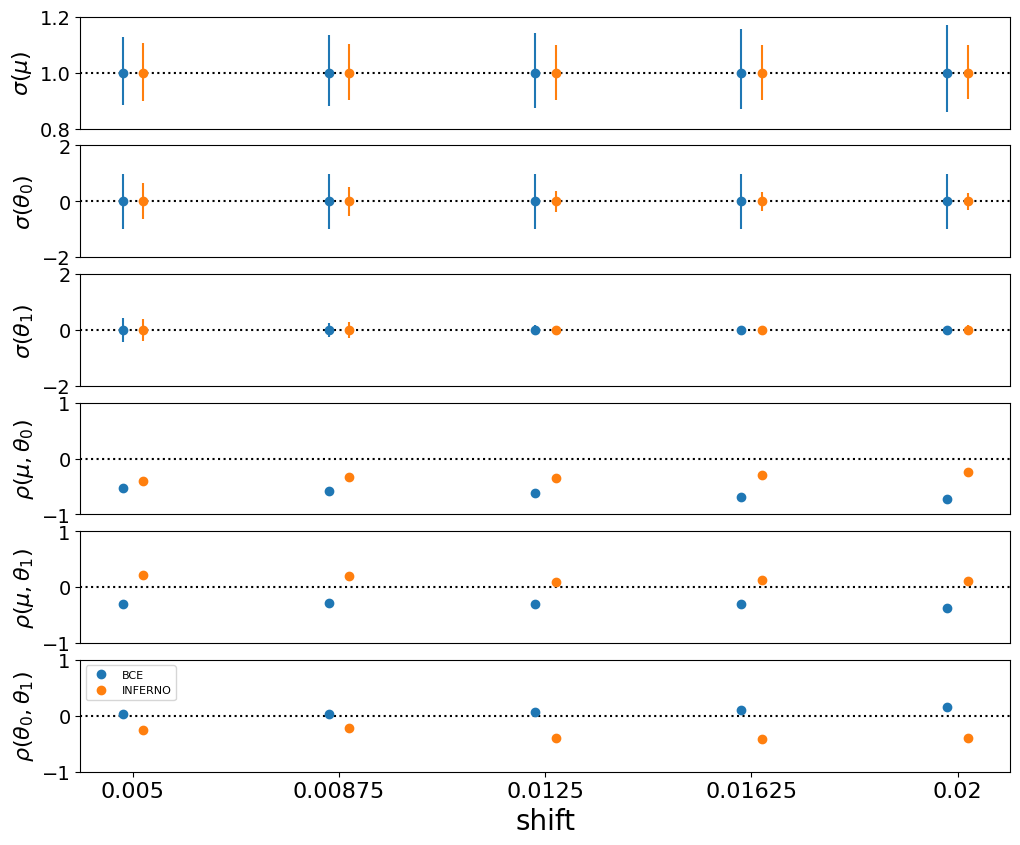

In [134]:
compare_bce_inf(artsig)

## NNuis variation

In [130]:
def load_minos_nnuis(path, name, np_name="TTJets_signal_artsig_aplanarity", n_points=3):
    
    bce = []
    bce_corr = []
    bce_np = []
    inferno = []
    inferno_corr = []
    inferno_np = []
    for i in range(n_points):
        
        path_name = path + name + "_" + str(i)
        with open(path_name + '/fit/bce_asimov/fit_results.json') as json_file:
            results = json.load(json_file)
            print(results)
            bce.append(results["minos_mu"])
            """
            dim = int(np.sqrt(len(results["corr_mat"])))
            corrmat = np.array(results["corr_mat"]).reshape(dim, dim)
            idx_mu = results["labels"].index('mu')
            idx_np = results["labels"].index(np_name)
            bce_corr.append(corrmat[idx_mu, idx_np])
            bce_np.append(results["uncertainty"][idx_np])
            """
        with open(path_name + '/fit/inferno_asimov/fit_results.json') as json_file:
            results = json.load(json_file)
            #print(results)
            inferno.append(results["minos_mu"])
            """
            dim = int(np.sqrt(len(results["corr_mat"])))
            corrmat = np.array(results["corr_mat"]).reshape(dim, dim)
            idx_mu = results["labels"].index('mu')
            idx_np = results["labels"].index(np_name)
            inferno_corr.append(corrmat[idx_mu, idx_np])
            inferno_np.append(results["uncertainty"][idx_np])
            """
            
    return bce, inferno, bce_corr, inferno_corr, bce_np, inferno_np

In [132]:
path = "/home/centos/mount_point/data/artificial_nnuis/"
name = "nnuis"
bce, inferno, bce_corr, inferno_corr,  bce_np, inferno_np = load_minos_nnuis(path, name, np_name="mistag")

{'labels': ['QCD_norm', 'mu', 'TTJets_signal_artsig_aplanarity'], 'bestfit': [1.0000000024034825, 1.0000000204474222, 1.2298974639071703e-08], 'uncertainty': [0.021949732930363453, 0.12193698189785857, 0.990734098015295], 'minos_mu': [-0.1157079884084442, 0.1289448561510676], 'corr_mat': [0.9999999999999999, -0.3438160136269158, 0.1404096494327192, -0.3438160136269158, 1.0, -0.6050942642811016, 0.1404096494327192, -0.6050942642811016, 0.9999999999999999]}
{'labels': ['QCD_norm', 'mu', 'TTJets_signal_artsig_aplanarity', 'TTJets_signal_artsig_MET_met'], 'bestfit': [1.0000000000061602, 1.0000000000515588, 5.604375427278874e-11, 1.0692939676065771e-10], 'uncertainty': [0.032236627738295165, 0.25027717865996685, 0.9914814156917984, 0.7111940334203628], 'minos_mu': [-0.19115418770307663, 0.37829012676235035], 'corr_mat': [1.0000000000000002, -0.7538701636175598, 0.077983634898808, 0.72990711220344, -0.7538701636175598, 1.0, -0.2731387695612785, -0.8701203988138684, 0.077983634898808, -0.2731

In [135]:
inferno

[[-0.09659047621215305, 0.09926059083794872],
 [-0.1408030689132728, 0.14883857811778742],
 [-0.14949479838970922, 0.17397172441931819]]

In [136]:
x = np.arange(3)
y = np.ones(3)

(0.5, 1.5)

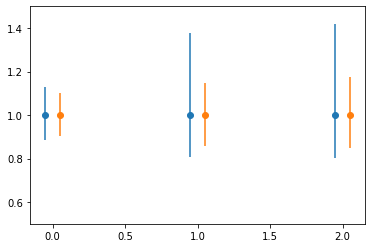

In [138]:
plt.errorbar(x-0.05, y, yerr=abs(np.array(bce)).T, fmt='o')
plt.errorbar(x+0.05, y, yerr=abs(np.array(inferno)).T, fmt='o')
plt.ylim([0.5, 1.5])

In [105]:
inferno_

NameError: name 'inferno_' is not defined

In [89]:
bce_np

[0.9929533080610917,
 0.9918262665227491,
 0.9879917477398934,
 0.9842773264042712,
 0.9798108640318024]

In [17]:
y = np.ones(5)

In [16]:
x = np.arange(5)

In [38]:
abs(np.array(bce))

array([[0.11040751, 0.11990796],
       [0.11458869, 0.12798798],
       [0.12117015, 0.1383714 ],
       [0.1237126 , 0.14522364],
       [0.12776593, 0.15416834]])

(0.7, 1.3)

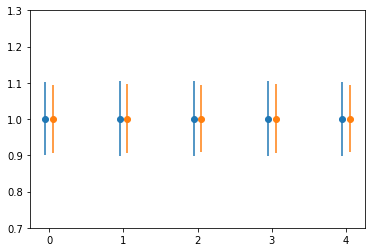

In [106]:
plt.errorbar(x-0.05, y, yerr=abs(np.array(bce)).T, fmt='o')
plt.errorbar(x+0.05, y, yerr=abs(np.array(inferno)).T, fmt='o')
plt.ylim([0.7, 1.3])

In [107]:
x

array([0, 1, 2, 3, 4])

(0.0, 1.5)

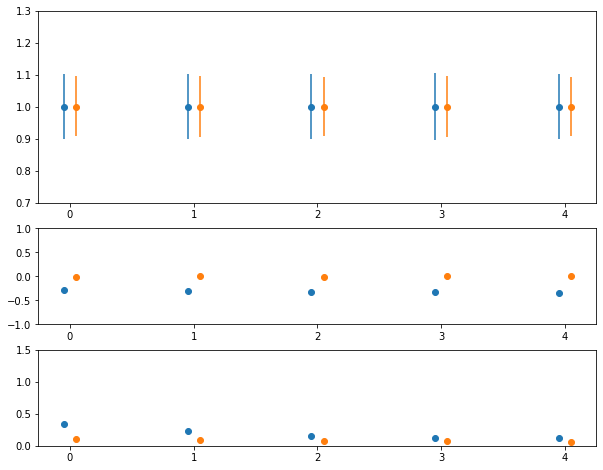

<ErrorbarContainer object of 3 artists>

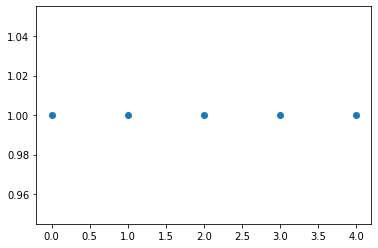

In [30]:
plt.errorbar(x,y, fmt='o')

In [3]:
bce, inferno = load_minos(path, name)

In [10]:
bce

[[-0.11040750674663034, 0.11990795996154469],
 [-0.11458868839833147, 0.12798798114398016],
 [-0.1211701486312236, 0.1383713993470664],
 [-0.12371259650319466, 0.14522363971146363],
 [-0.127765927619844, 0.15416833763233734]]

In [9]:
np.array(bce)[:,1]

array([0.11990796, 0.12798798, 0.1383714 , 0.14522364, 0.15416834])

In [6]:
results

{'labels': ['QCD_norm', 'mu', 'TTJets_signal_artsig_aplanarity'],
 'bestfit': [1.0000000002601304, 1.0000000022009925, 8.087066624001826e-10],
 'uncertainty': [0.021807833861049508,
  0.11490035684635874,
  0.9929533080610917],
 'minos_mu': [-0.11040750674663034, 0.11990795996154469],
 'corr_mat': [1.0000000000000002,
  -0.31448048151755115,
  0.06435568289327588,
  -0.31448048151755115,
  0.9999999999999999,
  -0.529745728740233,
  0.06435568289327588,
  -0.529745728740233,
  1.0]}

In [2]:
sample_names = glob.glob("/home/centos/mount_point/data/samples/*.h5")

In [3]:
st = "/home/centos/mount_point/data/samples/TTJets_bkg_07_taue_up.h5"

In [4]:
st.split("/")[-1][:-3]

'TTJets_bkg_07_taue_up'

In [5]:
samples = {}
for s in sample_names:
    if "cutflow" in s: continue
    name = s.split("/")[-1][:-3]
    samples[name] = pd.read_hdf(s)

In [6]:
from preproc import set_weights

In [7]:
set_weights(samples, ["btag"])

In [45]:
import awkward
import numpy as np

In [73]:
series[0]

<Array [76.2, 69.9, 52.4, 36.4] type='4 * float64'>

In [76]:
awkward.flatten(series)

<Array [76.2, 69.9, 52.4, ... 84.1, 57.3, 53.3] type='195655 * float64'>

In [77]:
def stack_weight(weight, n):
    return np.full(n ,weight)

In [80]:
variable = "Jet_pt"

In [93]:
if "Jet_" in variable:
    values = awkward.from_iter(samples["TTJets_signal"][variable].values)
    weight_stacked = samples["TTJets_signal"].apply(lambda x : stack_weight(x["weight"] ,x["nJets"]), axis=1)
    weights = awkward.from_iter(weight_stacked.values)

AttributeError: no field named 'flatten'

(https://github.com/scikit-hep/awkward-1.0/blob/1.7.0/src/awkward/highlevel.py#L1131)

In [84]:
import stack
import importlib

In [94]:
importlib.reload(stack)

<module 'stack' from '/home/centos/cmsopen/inferno/stack.py'>

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


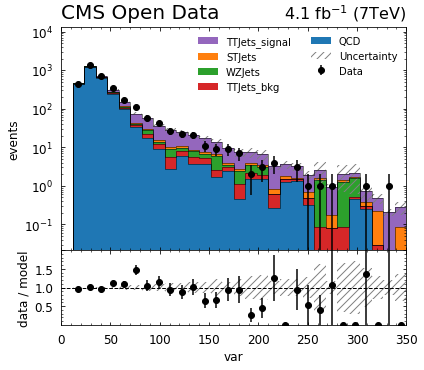

In [95]:
stack.plot_from_pd(samples)

In [101]:
variables = [
    {"var_name" : "PV_npvs", "bins" : 30, "xlow" : 0., "xup" : 30, "xtitle" : "primary vertices", "max_sf": 50, "log":False},
    {"var_name" : "MET_met", "bins" : 30, "xlow" : 0., "xup" : 400, "xtitle" : "MET [GeV]", "max_sf": 1.5, "log":True},
    {"var_name" : "Jet_pt", "bins" : 30, "xlow" : 0., "xup" : 500., "xtitle" : "p_{T}(jet) [GeV]", "max_sf": 15, "log":False},
    {"var_name" : "Jet_eta", "bins" : 30, "xlow" : -3., "xup" : 3., "xtitle" : "#eta(jet)", "max_sf": 50, "log":False},
    {"var_name" : "Tau_pt", "bins" : 30, "xlow" : 0., "xup" : 300, "xtitle" : "p_{T}(#tau) [GeV]", "max_sf": 15, "log":False},
    {"var_name" : "Tau_eta", "bins" : 30, "xlow" : -3., "xup" : 3., "xtitle" : "#eta(#tau)", "max_sf": 50, "log":False},
    {"var_name" : "aplanarity", "bins" : 20, "xlow" : 0., "xup" : 0.5, "xtitle" : "aplanarity", "max_sf": 15, "log":False},
    {"var_name" : "ht", "bins" : 20, "xlow" : 0., "xup" : 1600., "xtitle" : "H_{T} [GeV]", "max_sf": 15, "log":False},
    {"var_name" : "chargeEta", "bins" : 20, "xlow" : -3., "xup" : 3., "xtitle" : "q #times #eta(#tau)", "max_sf": 50, "log":False},
    {"var_name" : "deltaPhiTauMet", "bins" : 20, "xlow" : 0., "xup" : 3.2, "xtitle" : "#Delta#phi(#tau, MET)", "max_sf": 50, "log":False},
    {"var_name" : "mt", "bins" : 20, "xlow" : 0., "xup" : 300., "xtitle" : "M_{T}(#tau, MET) [GeV]", "max_sf": 15, "log":True},
    {"var_name" : "mTauJet", "bins" : 20, "xlow" : 0., "xup" : 2500., "xtitle" :"M(#tau, jets) [GeV]", "max_sf": 15, "log":False},
    {"var_name" : "nJets", "bins" : 10, "xlow" : 3., "xup" : 13., "xtitle" : "N. of jets", "max_sf": 50, "log":True},
    {"var_name" : "sphericity", "bins" : 20, "xlow" : 0., "xup" : 1.0, "xtitle" : "sphericity", "max_sf": 15, "log":False}
]    

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: divide by zero encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: divide by zero encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


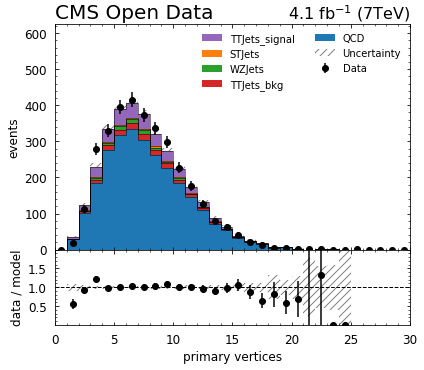

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


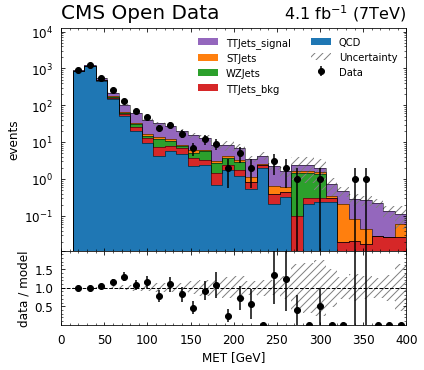

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


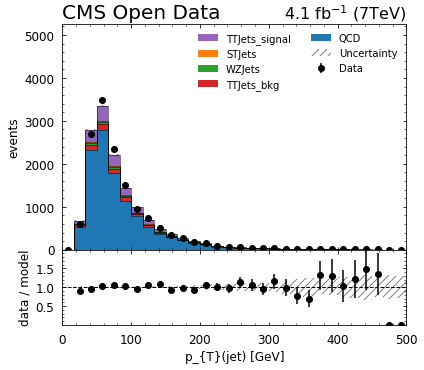

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


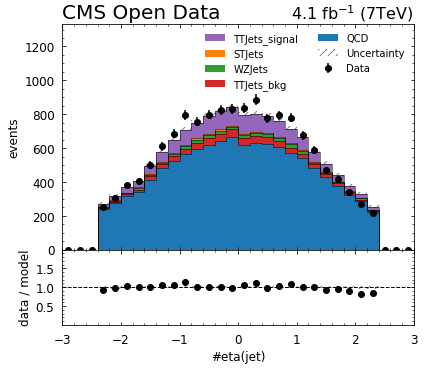

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


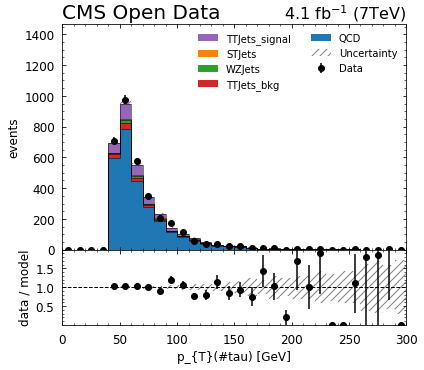

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


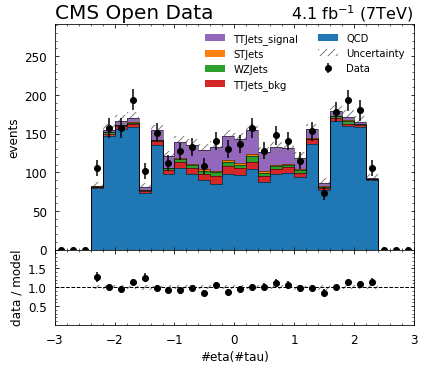

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


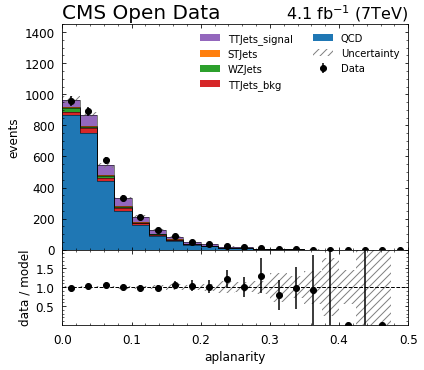

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


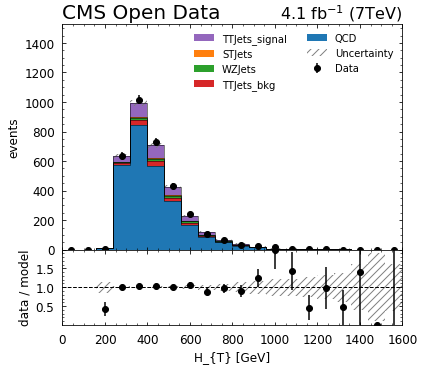

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


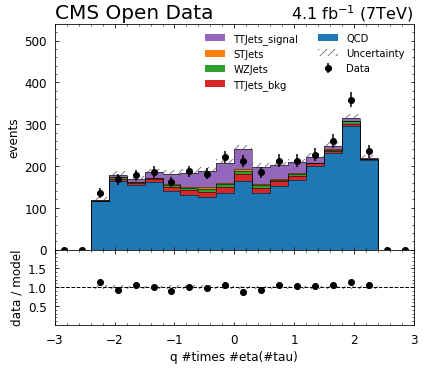

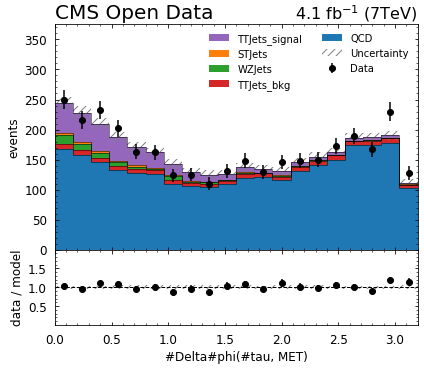

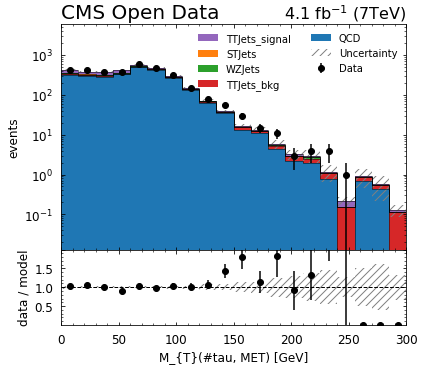

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


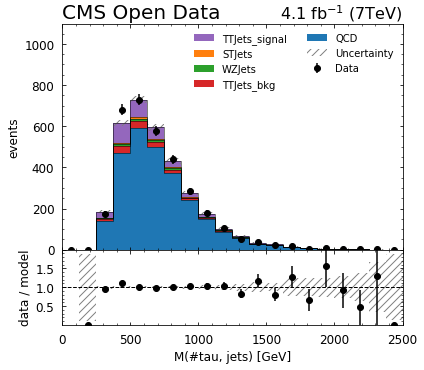

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


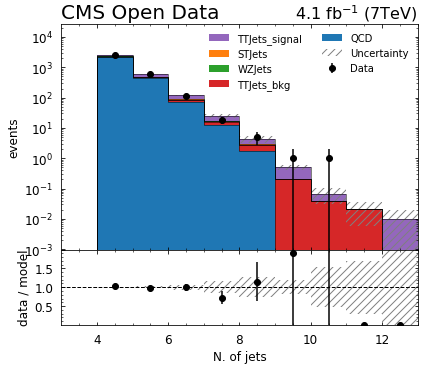

predicted yield is zero in {n_zero_pred} bin(s), excluded from ratio plot


/home/centos/cmsopen/inferno/stack.py:266: RuntimeWarning: invalid value encountered in true_divide
  rel_mc_unc = total_model_unc / total_yield
/home/centos/cmsopen/inferno/stack.py:280: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio = data_histogram_yields / total_yield
/home/centos/cmsopen/inferno/stack.py:281: RuntimeWarning: invalid value encountered in true_divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


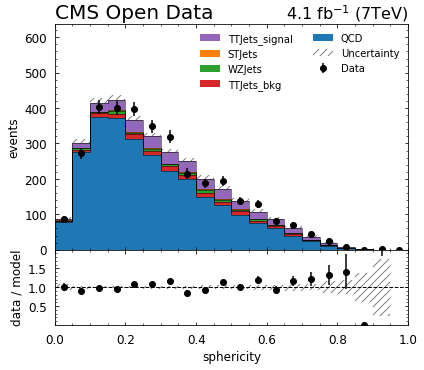

In [102]:
importlib.reload(stack)
for var in variables:
    stack.plot_from_pd(samples, var["var_name"], bins=var["bins"], 
                       range=(var["xlow"], var["xup"]), title=var["xtitle"], log_scale=var["log"])

In [109]:
variables = [
    {"var_name" : "MET_met", "bins" : 30, "xlow" : 0., "xup" : 400, "xtitle" : "MET [GeV]", "max_sf": 1.5, "log":True},
    {"var_name" : "Tau_eta", "bins" : 30, "xlow" : -3., "xup" : 3., "xtitle" : "#eta(#tau)", "max_sf": 50, "log":False},
    {"var_name" : "aplanarity", "bins" : 20, "xlow" : 0., "xup" : 0.5, "xtitle" : "aplanarity", "max_sf": 15, "log":False},
    {"var_name" : "ht", "bins" : 20, "xlow" : 0., "xup" : 1600., "xtitle" : "H_{T} [GeV]", "max_sf": 15, "log":False},
    {"var_name" : "chargeEta", "bins" : 20, "xlow" : -3., "xup" : 3., "xtitle" : "q #times #eta(#tau)", "max_sf": 50, "log":False},
    {"var_name" : "deltaPhiTauMet", "bins" : 20, "xlow" : 0., "xup" : 3.2, "xtitle" : "#Delta#phi(#tau, MET)", "max_sf": 50, "log":False},
    {"var_name" : "mt", "bins" : 20, "xlow" : 0., "xup" : 300., "xtitle" : "M_{T}(#tau, MET) [GeV]", "max_sf": 15, "log":True},
    {"var_name" : "mTauJet", "bins" : 20, "xlow" : 0., "xup" : 2500., "xtitle" :"M(#tau, jets) [GeV]", "max_sf": 15, "log":False},
    {"var_name" : "sphericity", "bins" : 20, "xlow" : 0., "xup" : 1.0, "xtitle" : "sphericity", "max_sf": 15, "log":False}
]    

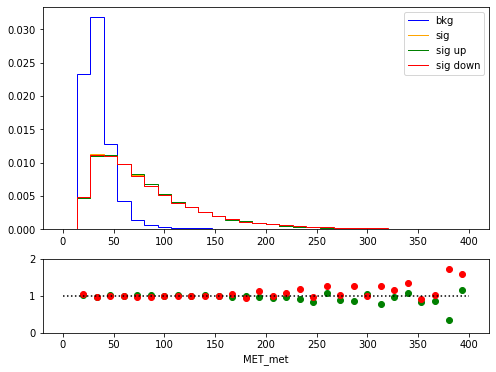

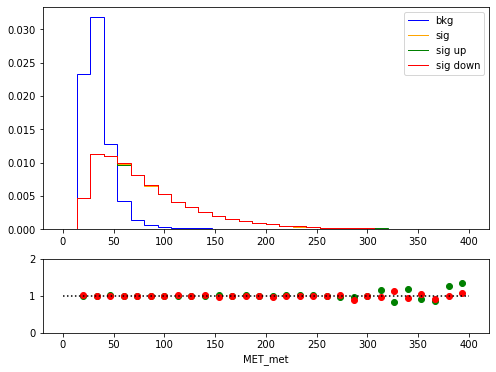

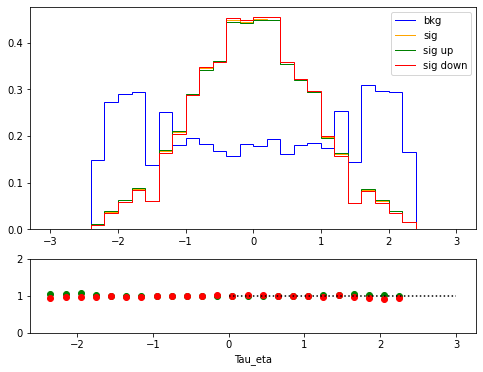

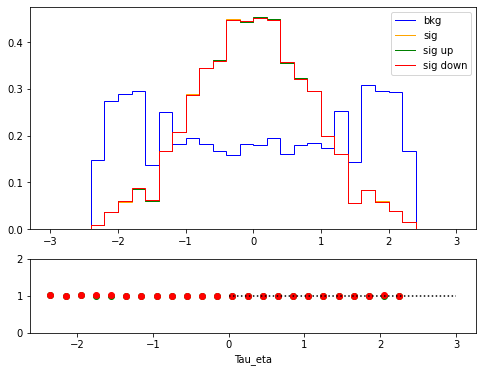

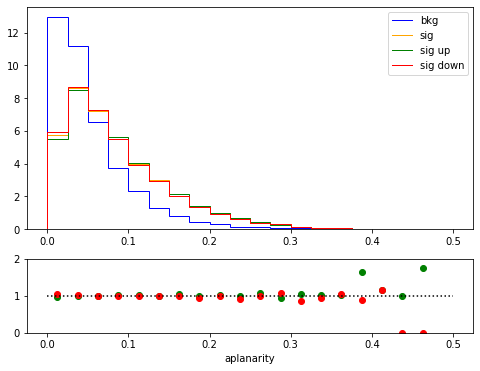

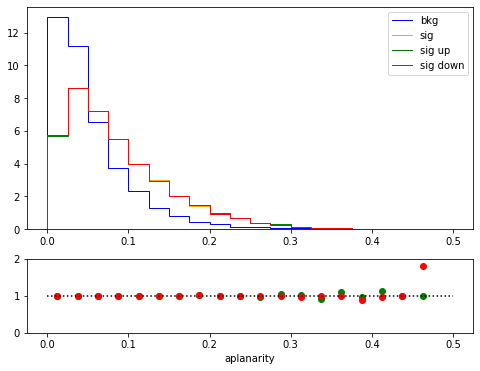

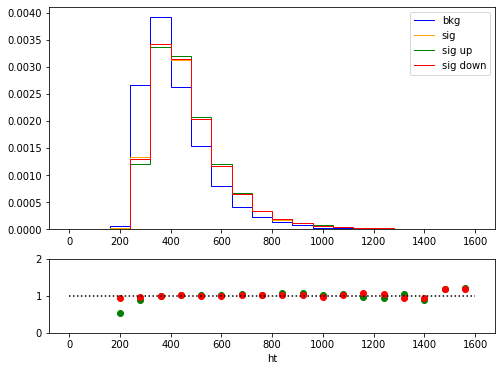

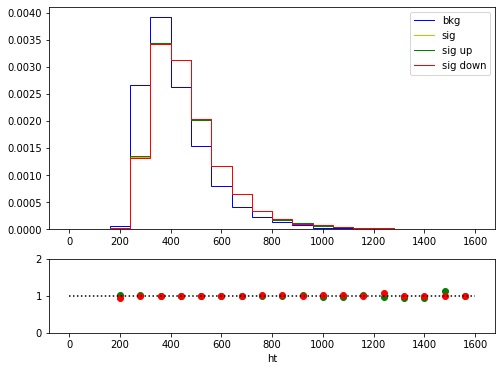

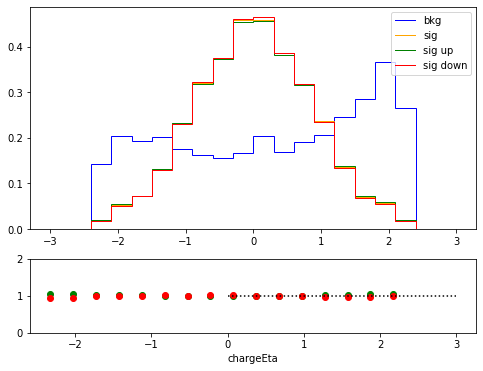

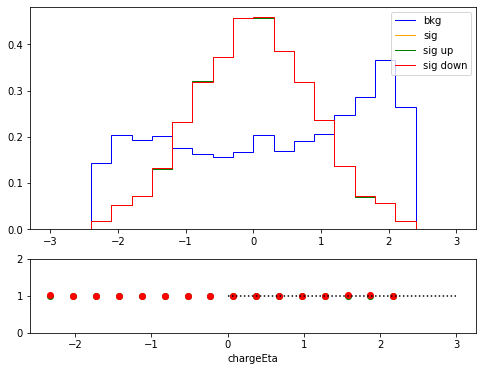

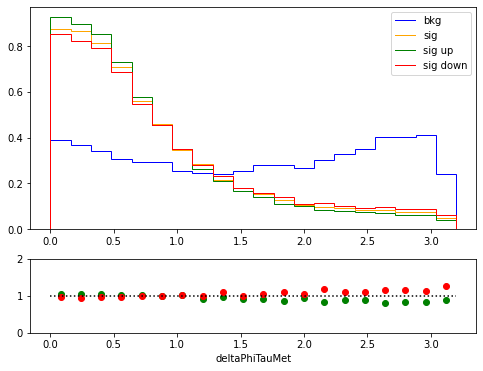

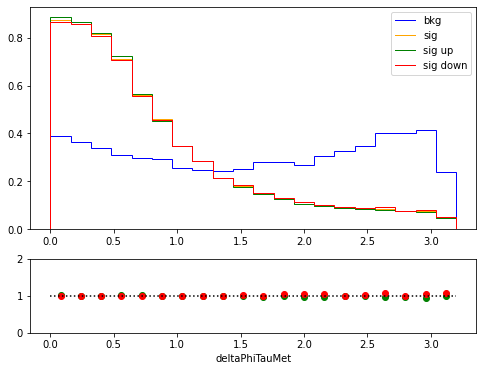

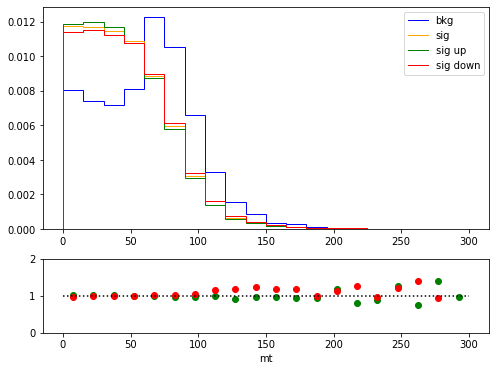

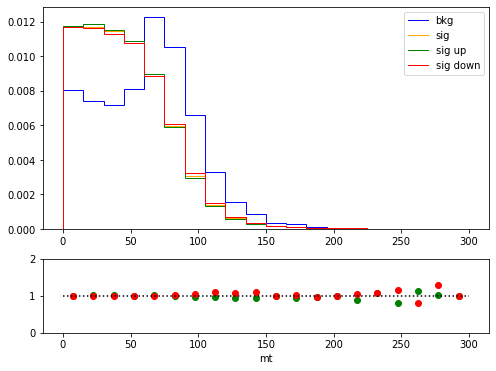

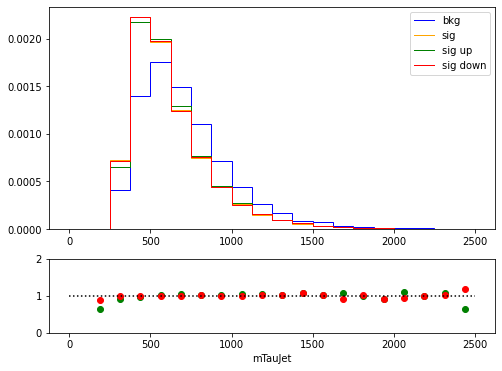

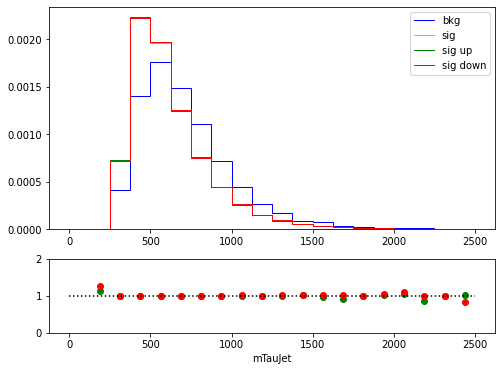

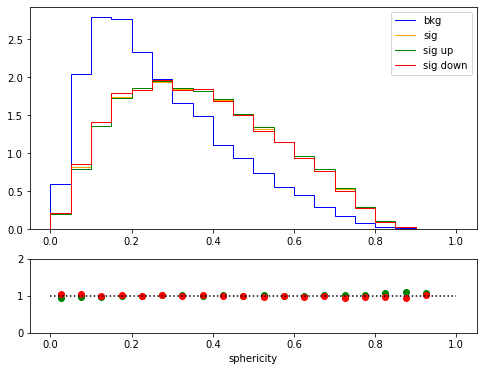

/home/centos/cmsopen/inferno/stack.py:18: RuntimeWarning: divide by zero encountered in true_divide
  ax2.scatter(centers, np.array(down) / np.array(sig), color="red")


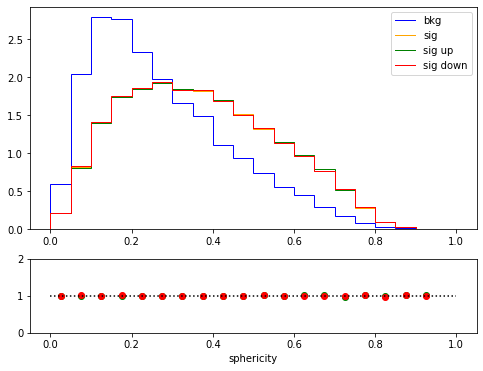

In [110]:
syst = ["09_taue", "jer"]
for var in variables:
    stack.plot_var_shape(samples, syst, [], var = var['var_name'], bins=var["bins"], range=(var["xlow"], var["xup"]))

In [19]:
ss = ["TTJets_signal", "TTJets_bkg", "STJets", "WZJets", "QCD"]

In [15]:
samples["TTJets_signal"]

,Jet_pt,Jet_px,Jet_py,Jet_pz,Jet_e,Jet_eta,Jet_phi,Jet_mass,Jet_csvDisc,Jet_flavour,...,ht,h_jet,ht_jet,chargeEta,mTauJet,mt,deltaPhiTauMet,nJets,aplanarity,sphericity
0,"[76.23234885633065, 69.93361456558159, 52.4094...","[-75.87731888128059, 13.801390174315642, 51.82...","[7.3486871184133475, 68.55824061831963, 7.7796...","[70.70925747176811, -11.058637210102978, -53.7...","[104.38812972638222, 73.12143926009217, 75.710...","[0.8292044, -0.1574788, -0.89936554, 1.1934923]","[3.0450442, 1.3721424, 0.14899139, 1.7286005]","[9.258048421078456, 18.26858128232152, 9.80115...","[0.9130862, 0.07296877, 0.9932897, 0.51457083]","[-5, -1, 5, -2]",...,290.898726,319.253620,238.279887,0.098549,361.638426,9.238372,0.114702,4,0.050326,0.517126
1,"[133.2043352159235, 75.40760661075183, 59.1363...","[87.80442494050648, -54.86599313569481, 54.876...","[100.16874359880397, -51.73035896011337, -22.0...","[127.41649597590627, -337.5295404479445, -47.0...","[185.7629808362091, 346.0730550797616, 76.5915...","[0.85031307, -2.2041428, -0.7286969, 1.8412409...","[0.8510806, -2.385602, -0.38189688, -0.0797716...","[23.011441452729287, 12.412540362261097, 12.62...","[0.013562527, 0.080697425, 0.13190195, 0.97171...","[-3, 2, 21, 5, 21]",...,440.815398,846.736453,380.141074,-0.084550,894.162165,24.981896,0.268102,5,0.039740,0.154885
2,"[281.2431838841985, 69.41119373266702, 45.4511...","[-281.1386473213563, -43.67045200131413, 42.56...","[-7.667677153556837, 53.951881145759245, -15.9...","[-244.19511421366676, -55.940233665505055, -12...","[374.09998250825294, 89.71106194703496, 133.08...","[-0.7850957, -0.7372884, -1.7343334, -0.542802...","[-3.1143258, 2.251263, -0.35853338, -2.3677301...","[34.95438652636017, 10.042461540942895, 9.3304...","[0.19616026, 0.8553413, 0.9984772, 0.25188956,...","[21, 5, -5, 21, 21]",...,616.343417,667.605368,460.828235,-0.781336,626.741711,16.462205,0.113007,5,0.034599,0.438753
4,"[245.52968130234694, 103.10389522662354, 47.59...","[-86.7208391651268, 67.5284208839117, 13.50246...","[-229.7048480257642, 77.91229426210664, 45.641...","[-302.5022831724694, -8.22667630293443, -42.37...","[391.22955973110254, 104.5680628241965, 64.869...","[-1.0363239, -0.07970574, -0.8016586, -0.48772...","[-1.9317846, 0.8566731, 1.2831627, -3.058876]","[35.610412921739226, 15.37488819579994, 12.114...","[0.006628145, 0.27827927, 0.98839146, 0.08028755]","[21, 2, 5, 2]",...,496.056781,608.387210,441.796817,-0.310569,555.370084,42.891924,0.796644,4,0.026440,0.125787
5,"[156.8528325434254, 146.7591318425184, 124.951...","[0.5266114842674127, -86.45248098444301, 123.7...","[156.85194437347565, 118.59262322839561, 17.01...","[218.58681449474824, 197.2150363054688, 80.958...","[269.9662337691131, 246.58131392201614, 151.49...","[1.1342442, 1.104877, 0.6094784, 1.3070724, 0....","[1.567439, 2.200713, 0.13659358, -1.6809412, 2...","[22.333107527084167, 19.243980310059214, 27.99...","[0.9999407, 0.1203655, 0.5895874, 0.28252742, ...","[-5, 3, 5, 21, -4]",...,667.422180,939.484607,603.579261,0.244730,685.191449,37.803811,0.347520,5,0.174086,0.409456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60484,"[134.75061707861278, 105.4542437611326, 72.064...","[-131.8737601687236, -92.95346001487015, 70.32...","[-27.695505527543055, 49.80212897420527, -15.7...","[139.74261459084033, 115.97906657681108, -93.6...","[196.0623304486036, 158.69355648542225, 118.45...","[0.9073281, 0.9502156, -1.0779651, 0.19035017,...","[-2.9345858, 2.6497364, -0.21985339, 2.0594559...","[27.471985045627434, 24.73658344536716, 8.4847...","[0.011085462, 0.022915157, 0.99984, 0.9801115,...","[21, -2, 5, -5, 0, 0]",...,549.233063,730.659450,443.308098,0.340606,837.191196,55.515881,0.586703,6,0.067183,0.210311
60485,"[185.64654484012044, 82.61443369455446, 60.076...","[148.91809313367582, -73.94016771528364, 55.08...","[110.85143665316231, -36.851004295048206, 23.9...","[-12.573777246822093, -114.72150419919129, -42...","[187.076309594392,